In [ ]:
# TASK- TO BUILD A MODEL THAT GIVEN 4 MEASUREMENTS OF A FLOWER, 
# IT CAN PREDICT ITS SPECIE == This is a CLASSIFICATION PROBLEM. 

In [1]:

#Step 1: Preparing the Data- 

                    # 1) Load the Data

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and labels (y)
X = iris.data  # Feature data (measurements)
y = iris.target  # Labels (species)

# Get feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

# Display basic information
print("=" * 60)
print("IRIS DATASET INFORMATION")
print("=" * 60)
print(f"\nDataset description:\n{iris.DESCR[:500]}...")
print("\n" + "=" * 60)

# Display dataset dimensions
print(f"\nFeature matrix (X) shape: {X.shape}")
print(f"Labels vector (y) shape: {y.shape}")
print(f"\nNumber of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(target_names)}")

# Display feature names
print(f"\nFeature names:")
for i, name in enumerate(feature_names):
    print(f"  {i+1}. {name}")

# Display target names (flower species)
print(f"\nTarget names (species):")
for i, name in enumerate(target_names):
    print(f"  {i}. {name}")

# Display first 5 samples
print("\n" + "=" * 60)
print("FIRST 5 SAMPLES")
print("=" * 60)
print("\nFeatures (X):")
print(X[:5])
print("\nLabels (y):")
print(y[:5])
print(f"Species: {[target_names[label] for label in y[:5]]}")

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[label] for label in y]

print("\n" + "=" * 60)
print("DATAFRAME VIEW (First 10 rows)")
print("=" * 60)
print(df.head(10))

# Display class distribution
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{target_names[label]}: {count} samples")

# Display statistical summary
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(df.describe())

# You can now use X and y for machine learning tasks
print("\n" + "=" * 60)
print("READY FOR MACHINE LEARNING!")
print("=" * 60)
print("Variables available:")
print("  X: Feature matrix (numpy array)")
print("  y: Target labels (numpy array)")
print("  df: Complete dataset as pandas DataFrame")

IRIS DATASET INFORMATION

Dataset description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====...


Feature matrix (X) shape: (150, 4)
Labels vector (y) shape: (150,)

Number of samples: 150
Number of features: 4
Number of classes: 3

Feature names:
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

Target names (species):
  0. setosa
  1. versicolor
  2. virginica

FIRST 5 SAMPLES

Features (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Labels (y)

In [2]:
             # 11. Exploring these data to get the statistics of each of these species

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and labels (y)
X = iris.data
y = iris.target

# Create a pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [iris.target_names[label] for label in y]

print("=" * 80)
print("IRIS DATASET - SUMMARY STATISTICS BY SPECIES")
print("=" * 80)

# Overall statistics
print("\n" + "=" * 80)
print("OVERALL STATISTICS (All Species Combined)")
print("=" * 80)
print(df.describe())

# Statistics for each species
for species in iris.target_names:
    print("\n" + "=" * 80)
    print(f"STATISTICS FOR {species.upper()}")
    print("=" * 80)
    
    species_data = df[df['species'] == species].drop('species', axis=1)
    
    # Detailed statistics
    stats = species_data.describe()
    print(stats)
    
    # Additional statistics
    print(f"\nAdditional metrics for {species}:")
    print(f"Sample count: {len(species_data)}")
    for col in species_data.columns:
        print(f"\n{col}:")
        print(f"  Mean:     {species_data[col].mean():.3f}")
        print(f"  Median:   {species_data[col].median():.3f}")
        print(f"  Std Dev:  {species_data[col].std():.3f}")
        print(f"  Variance: {species_data[col].var():.3f}")
        print(f"  Min:      {species_data[col].min():.3f}")
        print(f"  Max:      {species_data[col].max():.3f}")
        print(f"  Range:    {species_data[col].max() - species_data[col].min():.3f}")

# Comparison table - Mean values across species
print("\n" + "=" * 80)
print("COMPARISON: MEAN VALUES BY SPECIES")
print("=" * 80)
comparison_means = df.groupby('species').mean()
print(comparison_means)

# Comparison table - Standard deviation across species
print("\n" + "=" * 80)
print("COMPARISON: STANDARD DEVIATION BY SPECIES")
print("=" * 80)
comparison_std = df.groupby('species').std()
print(comparison_std)

# Comparison table - Min and Max values
print("\n" + "=" * 80)
print("COMPARISON: MIN VALUES BY SPECIES")
print("=" * 80)
comparison_min = df.groupby('species').min()
print(comparison_min)

print("\n" + "=" * 80)
print("COMPARISON: MAX VALUES BY SPECIES")
print("=" * 80)
comparison_max = df.groupby('species').max()
print(comparison_max)

# Key insights
print("\n" + "=" * 80)
print("KEY INSIGHTS")
print("=" * 80)
print("\nLargest average measurements by feature:")
for col in iris.feature_names:
    max_species = comparison_means[col].idxmax()
    max_value = comparison_means[col].max()
    print(f"  {col}: {max_species} ({max_value:.3f} cm)")

print("\nSmallest average measurements by feature:")
for col in iris.feature_names:
    min_species = comparison_means[col].idxmin()
    min_value = comparison_means[col].min()
    print(f"  {col}: {min_species} ({min_value:.3f} cm)")

IRIS DATASET - SUMMARY STATISTICS BY SPECIES

OVERALL STATISTICS (All Species Combined)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

STATISTICS FOR SETOSA
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
coun

In [3]:
          # 111. Split into training and test sets: 
#use scikit-learn’s train_test_split, using the 80: 20 split utility to shuffle and split the data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

print("=" * 80)
print("IRIS DATASET - TRAIN/TEST SPLIT (80:20)")
print("=" * 80)

# Display original dataset information
print("\nOriginal Dataset:")
print(f"  Total samples: {X.shape[0]}")
print(f"  Number of features: {X.shape[1]}")
print(f"  Feature names: {iris.feature_names}")
print(f"  Target names: {iris.target_names}")

# Split the dataset into training and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducibility
    stratify=y          # Ensures proportional class distribution
)

print("\n" + "=" * 80)
print("SPLIT RESULTS")
print("=" * 80)

print("\nTraining Set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Number of training samples: {X_train.shape[0]}")
print(f"  Percentage: {(X_train.shape[0] / X.shape[0]) * 100:.1f}%")

print("\nTest Set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Number of test samples: {X_test.shape[0]}")
print(f"  Percentage: {(X_test.shape[0] / X.shape[0]) * 100:.1f}%")

# Display class distribution in original dataset
print("\n" + "=" * 80)
print("CLASS DISTRIBUTION")
print("=" * 80)

print("\nOriginal Dataset:")
unique_orig, counts_orig = np.unique(y, return_counts=True)
for label, count in zip(unique_orig, counts_orig):
    print(f"  {iris.target_names[label]}: {count} samples ({count/len(y)*100:.1f}%)")

print("\nTraining Set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for label, count in zip(unique_train, counts_train):
    print(f"  {iris.target_names[label]}: {count} samples ({count/len(y_train)*100:.1f}%)")

print("\nTest Set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for label, count in zip(unique_test, counts_test):
    print(f"  {iris.target_names[label]}: {count} samples ({count/len(y_test)*100:.1f}%)")

# Display sample data from training set
print("\n" + "=" * 80)
print("SAMPLE DATA FROM TRAINING SET (First 5)")
print("=" * 80)
print("\nX_train (Features):")
print(X_train[:5])
print("\ny_train (Labels):")
print(y_train[:5])
print(f"Species: {[iris.target_names[label] for label in y_train[:5]]}")

# Display sample data from test set
print("\n" + "=" * 80)
print("SAMPLE DATA FROM TEST SET (First 5)")
print("=" * 80)
print("\nX_test (Features):")
print(X_test[:5])
print("\ny_test (Labels):")
print(y_test[:5])
print(f"Species: {[iris.target_names[label] for label in y_test[:5]]}")

print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print("\nDataset has been successfully split!")
print("Variables available:")
print("  X_train: Training features")
print("  X_test:  Test features")
print("  y_train: Training labels")
print("  y_test:  Test labels")
print("\nYou can now use these for training and evaluating machine learning models.")

IRIS DATASET - TRAIN/TEST SPLIT (80:20)

Original Dataset:
  Total samples: 150
  Number of features: 4
  Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  Target names: ['setosa' 'versicolor' 'virginica']

SPLIT RESULTS

Training Set:
  X_train shape: (120, 4)
  y_train shape: (120,)
  Number of training samples: 120
  Percentage: 80.0%

Test Set:
  X_test shape: (30, 4)
  y_test shape: (30,)
  Number of test samples: 30
  Percentage: 20.0%

CLASS DISTRIBUTION

Original Dataset:
  setosa: 50 samples (33.3%)
  versicolor: 50 samples (33.3%)
  virginica: 50 samples (33.3%)

Training Set:
  setosa: 40 samples (33.3%)
  versicolor: 40 samples (33.3%)
  virginica: 40 samples (33.3%)

Test Set:
  setosa: 10 samples (33.3%)
  versicolor: 10 samples (33.3%)
  virginica: 10 samples (33.3%)

SAMPLE DATA FROM TRAINING SET (First 5)

X_train (Features):
[[4.4 2.9 1.4 0.2]
 [4.9 2.5 4.5 1.7]
 [6.8 2.8 4.8 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]]

In [ ]:
                   # 1V. SCALING-
#For the Iris dataset, scaling isn’t strictly required because all features are in the same units (centimeters)

                  # 1V. SELECTION/ ENGINEERING-
#In this simple case, we will use all four available features as-is. We do not need to create new features or drop any for our initial model. 

In [2]:
# STEP 2- CHOOSING AND TRAINING A MODEL

# Initialize the model: import the classifier( Decision Tree) and create an instance of it.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("=" * 80)
print("DECISION TREE CLASSIFIER FOR IRIS DATASET")
print("=" * 80)

print("\nDataset Information:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Test samples: {X_test.shape[0]}")
print(f"  Number of features: {X_train.shape[1]}")
print(f"  Number of classes: {len(iris.target_names)}")
print(f"  Classes: {', '.join(iris.target_names)}")

print("\n" + "=" * 80)
print("INITIALIZE DECISION TREE CLASSIFIER")
print("=" * 80)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

print(f"\nModel Type: {type(model).__name__}")
print(f"\nModel created successfully!")
print(f"\nDefault Parameters:")
for param, value in model.get_params().items():
    print(f"  {param}: {value}")

print("\n" + "=" * 80)
print("ABOUT DECISION TREE CLASSIFIER")
print("=" * 80)
print("\nDecision Trees work by:")
print("  • Creating a tree-like model of decisions")
print("  • Splitting data based on feature values")
print("  • Making predictions by traversing the tree from root to leaf")
print("\nAdvantages:")
print("  • Easy to understand and interpret")
print("  • Requires little data preprocessing")
print("  • Can handle both numerical and categorical data")
print("  • Visual representation possible")

print("\n" + "=" * 80)
print("NEXT STEPS")
print("=" * 80)
print("\nThe Decision Tree model has been initialized and is ready!")
print("\n1. Train the model:")
print("   model.fit(X_train, y_train)")
print("\n2. Make predictions:")
print("   predictions = model.predict(X_test)")
print("\n3. Evaluate accuracy:")
print("   accuracy = model.score(X_test, y_test)")
print("   print(f'Accuracy: {accuracy * 100:.2f}%')")
print("\n4. Get feature importance:")
print("   importance = model.feature_importances_")
print("\nVariables available:")
print("  model   - Decision Tree Classifier (initialized)")
print("  X_train - Training features")
print("  X_test  - Test features")
print("  y_train - Training labels")
print("  y_test  - Test labels")


DECISION TREE CLASSIFIER FOR IRIS DATASET

Dataset Information:
  Training samples: 120
  Test samples: 30
  Number of features: 4
  Number of classes: 3
  Classes: setosa, versicolor, virginica

INITIALIZE DECISION TREE CLASSIFIER

Model Type: DecisionTreeClassifier

Model created successfully!

Default Parameters:
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: None
  max_features: None
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  monotonic_cst: None
  random_state: 42
  splitter: best

ABOUT DECISION TREE CLASSIFIER

Decision Trees work by:
  • Creating a tree-like model of decisions
  • Splitting data based on feature values
  • Making predictions by traversing the tree from root to leaf

Advantages:
  • Easy to understand and interpret
  • Requires little data preprocessing
  • Can handle both numerical and categorical data
  • Visual representation possible

NEXT STEPS

The 

In [5]:
#Train (fit) the model using the training data

model.fit(X_train, y_train)





DecisionTreeClassifier(random_state=42)

In [ ]:
# Side note: We chose a decision tree for its simplicity and interpretability. 

In [6]:
# STEP 3: MAKING PREDICTIONS

y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])



Predictions: [0 2 1 1 0]
True labels: [0 2 1 1 0]


In [7]:
# Make predictions on the test set
predictions = model.predict(X_test)

print(f"\n✓ Predictions completed!")
print(f"  Number of predictions made: {len(predictions)}")

# Display predictions vs actual values
print("\n" + "=" * 80)
print("PREDICTIONS vs ACTUAL VALUES (First 10 samples)")
print("=" * 80)

print("\n{:<6} {:<25} {:<25} {:<10}".format(
    "Sample", "Predicted", "Actual", "Correct?"
))
print("-" * 80)

for i in range(min(10, len(predictions))):
    pred_species = iris.target_names[predictions[i]]
    actual_species = iris.target_names[y_test[i]]
    is_correct = "✓ Yes" if predictions[i] == y_test[i] else "✗ No"
    
    print("{:<6} {:<25} {:<25} {:<10}".format(
        i+1, pred_species, actual_species, is_correct
    ))



✓ Predictions completed!
  Number of predictions made: 30

PREDICTIONS vs ACTUAL VALUES (First 10 samples)

Sample Predicted                 Actual                    Correct?  
--------------------------------------------------------------------------------
1      setosa                    setosa                    ✓ Yes     
2      virginica                 virginica                 ✓ Yes     
3      versicolor                versicolor                ✓ Yes     
4      versicolor                versicolor                ✓ Yes     
5      setosa                    setosa                    ✓ Yes     
6      versicolor                versicolor                ✓ Yes     
7      setosa                    setosa                    ✓ Yes     
8      setosa                    setosa                    ✓ Yes     
9      virginica                 virginica                 ✓ Yes     
10     versicolor                versicolor                ✓ Yes     


In [10]:
# ===============================================
#4 MODEL EVALUATION - PERFORMANCE METRICS
# ===============================================

# ✅ Import required libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# (Assume you already have `y_test`, `predictions`, and `iris` defined from your model)
# Example:
# predictions = model.predict(X_test)

print("=" * 80)
print("MODEL EVALUATION - PERFORMANCE METRICS")
print("=" * 80)

# ---------------------------------------------------------------------
# 1. ACCURACY SCORE
# ---------------------------------------------------------------------
print("\n" + "=" * 80)
print("1. ACCURACY SCORE")
print("=" * 80)

accuracy = accuracy_score(y_test, predictions)

print("\nCode:")
print("  accuracy = accuracy_score(y_test, predictions)")
print(f"\nResult:")
print(f"  Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"\nInterpretation:")
print(f"  The model correctly classified {accuracy * 100:.2f}% of the test samples.")

# ---------------------------------------------------------------------
# 2. CONFUSION MATRIX
# ---------------------------------------------------------------------
print("\n" + "=" * 80)
print("2. CONFUSION MATRIX")
print("=" * 80)

conf_matrix = confusion_matrix(y_test, predictions)

print("\nCode:")
print("  conf_matrix = confusion_matrix(y_test, predictions)")
print(f"\nResult:")
print(conf_matrix)

print(f"\nDetailed Confusion Matrix:")
print("\n{:<15} {:<12} {:<12} {:<12}".format(
    "Actual \\ Pred", "Setosa", "Versicolor", "Virginica"
))
print("-" * 55)
for i, species in enumerate(iris.target_names):
    row = "{:<15}".format(species)
    for j in range(3):
        row += " {:<12}".format(conf_matrix[i][j])
    print(row)

print(f"\nInterpretation:")
print(f"  Diagonal values = correct predictions")
print(f"  Off-diagonal values = misclassifications")
for i, species in enumerate(iris.target_names):
    correct = conf_matrix[i][i]
    total = np.sum(conf_matrix[i])
    print(f"  {species}: {correct}/{total} correctly classified")

# ---------------------------------------------------------------------
# 3. PRECISION, RECALL, F1-SCORE
# ---------------------------------------------------------------------
print("\n" + "=" * 80)
print("3. PRECISION, RECALL, F1-SCORE (One-line code)")
print("=" * 80)

report = classification_report(y_test, predictions, target_names=iris.target_names)

print("\nCode:")
print("  report = classification_report(y_test, predictions, target_names=iris.target_names)")
print(f"\nResult:")
print(report)

print(f"Metric Definitions:")
print(f"  • Precision: Of all predicted as class X, how many were actually class X?")
print(f"  • Recall:    Of all actual class X, how many did we correctly identify?")
print(f"  • F1-Score:  Harmonic mean of precision and recall (balance metric)")
print(f"  • Support:   Number of actual samples in each class")

# ---------------------------------------------------------------------
# SUMMARY
# ---------------------------------------------------------------------
print("\n" + "=" * 80)
print("SUMMARY OF ALL METRICS")
print("=" * 80)
print(f"\n✓ Accuracy Score:    {accuracy * 100:.2f}%")
print(f"✓ Confusion Matrix:  Generated (see above)")
print(f"✓ Precision/Recall:  Generated (see classification report)")


MODEL EVALUATION - PERFORMANCE METRICS

1. ACCURACY SCORE

Code:
  accuracy = accuracy_score(y_test, predictions)

Result:
  Accuracy: 0.9333 (93.33%)

Interpretation:
  The model correctly classified 93.33% of the test samples.

2. CONFUSION MATRIX

Code:
  conf_matrix = confusion_matrix(y_test, predictions)

Result:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Detailed Confusion Matrix:

Actual \ Pred   Setosa       Versicolor   Virginica   
-------------------------------------------------------
setosa          10           0            0           
versicolor      0            9            1           
virginica       0            1            9           

Interpretation:
  Diagonal values = correct predictions
  Off-diagonal values = misclassifications
  setosa: 10/10 correctly classified
  versicolor: 9/10 correctly classified
  virginica: 9/10 correctly classified

3. PRECISION, RECALL, F1-SCORE (One-line code)

Code:
  report = classification_report(y_test, predictions, target_names=

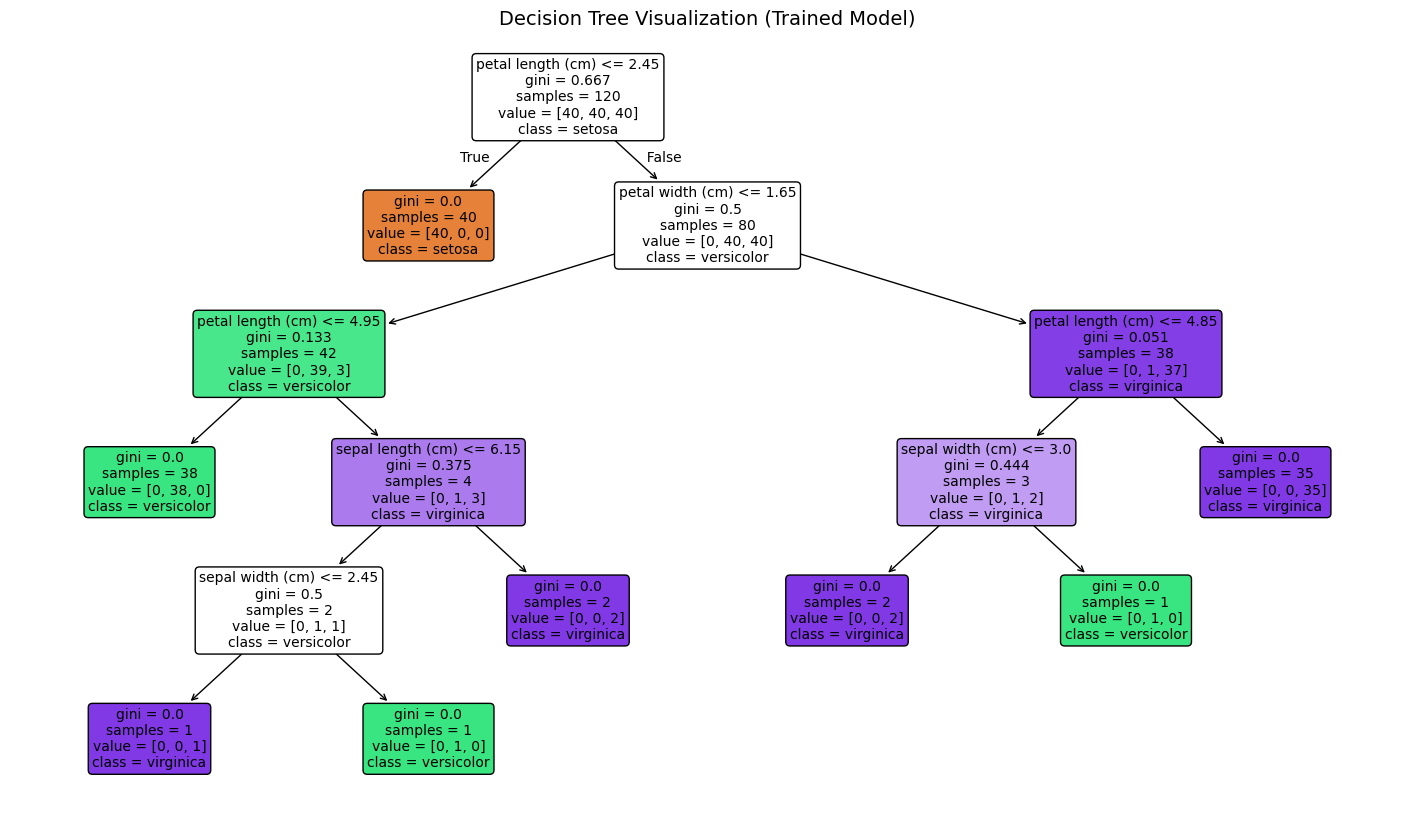

In [11]:
 #5) INTERPRETING THE MODEL

# ===============================================
# VISUALIZE DECISION TREE MODEL
# ===============================================

# ✅ Import required libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# (Assumes the following already exist from your earlier code)
# model       -> your trained DecisionTreeClassifier
# iris        -> dataset (with feature_names and target_names)

# 1️⃣ Plot the decision tree
plt.figure(figsize=(18, 10))  # adjust size as needed
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,          # color nodes by class
    rounded=True,         # rounded corners for readability
    fontsize=10           # font size for text
)

# 2️⃣ Add a title and display
plt.title("Decision Tree Visualization (Trained Model)", fontsize=14)
plt.show()


In [ ]:
  #6 ITERATING AND IMPROVING THE MODEL
# methods are :
 # 1) using another algorithm instead of decision tree e.g K Nearest Neighbour or Similarly, we could try an SVM with different kernels. The process is about experimentation and informed adjustments. Each time, we should use the test set (or better, a cross-validation scheme) to objectively measure improvement.


 # 2) using HYPERPARAMETERS
 # 3) FEATURE ENGINEERING: We used the four features as given, we could create or use features that make the task easier.
#For instance, maybe the ratio of petal length to petal width could be an informative feature to add (as it might help distinguish Versicolor vs Virginica)
#Feature engineering is part art and part science – it requires understanding the data domain and sometimes analyzing feature importances from a model to decide what to try next.
# 4) Gather more data: In many cases, the single best way to improve an AI model is to provide it with more training data.
#Increasing the volume and diversity of the training data often leads to improved model robustness and accuracy .
 # 5) Improve data quality: This is related to the above. If there were any noise or errors in the dataset, cleaning them up could help. The Iris data is pretty clean (it’s a textbook dataset), but real-world data might have missing values, outliers, or mislabeled examples. Addressing those issues is an important step in the iteration process (though again, not needed in our current example).

In [12]:
# USING THE KNN MODEL IMPROVE, BY USING ANOTHER ALGORITHM
#To illustrate iteration: suppose we decide to try a k-NN model to see if it matches the decision tree’s performance. We could do:

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("k-NN accuracy:", accuracy_score(y_test, y_pred2))


k-NN accuracy: 1.0


In [ ]:
#This give 100% performance, so DEFINITELY A BETTER WAY TO IMPROVE PERFORMANCE!!!

In [13]:
#ANOTHER EXAMPLE OF METHOD TO IMPROVE PERFORMANCE IS HYPERPARAMETER i.e of tuning: for our decision tree, we might realize it’s overfitting (perhaps it got 100% on training data but 90% on test). We could limit the tree’s depth to, say, 3 levels:

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# In summary, the initial model gives us a baseline, and then we iterate: 
# try model tweaks, different algorithms, 
#and data enhancements to see if we can further improve the performance. 
#This iterative cycle is a core part of machine learning development.



In [1]:
import os
print(os.path.abspath("FIRST AI MODEL- IRIS CLASSIFIER FLOWER.ipynb"))


C:\Users\titio\FIRST AI MODEL- IRIS CLASSIFIER FLOWER.ipynb
